# Build a DecisionTreeClassifier for the Wine dataset

## Import libraries

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import graphviz

## Load the wine dataset into memory and display information about the number of features (dimensionality) and the number of objects (size)

In [2]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
print(f"Number of Features: {df.shape[1]}")
print(f"Number of Objects: {df.shape[0]}")
df['target'] = data.target
print(f"Shape: {df.shape}")
print(df.head())

Number of Features: 13
Number of Objects: 178
Shape: (178, 14)
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   


## Assign labels to the loaded data and display the number of classes

In [3]:
labels = data.target_names
feature_names = data.feature_names
print(f"Number of Classes: {len(labels)} \n {labels}")
print(f"Number of Features: {len(feature_names)} \n {feature_names}")

Number of Classes: 3 
 ['class_0' 'class_1' 'class_2']
Number of Features: 13 
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


## Split the data into training (70%) and test (30%) sets

In [4]:
X = df[feature_names]
Y = df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, train_size=0.7, test_size=0.3)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print(X_train.head(3))
print(X_test.head(3))

(124, 13) (124,)
(54, 13) (54,)
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
22     13.71        1.86  2.36               16.6      101.0           2.61   
108    12.22        1.29  1.94               19.0       92.0           2.36   
175    13.27        4.28  2.26               20.0      120.0           1.59   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
22         2.88                  0.27             1.69              3.8  1.11   
108        2.04                  0.39             2.08              2.7  0.86   
175        0.69                  0.43             1.35             10.2  0.59   

     od280/od315_of_diluted_wines  proline  
22                           4.00   1035.0  
108                          3.02    312.0  
175                          1.56    835.0  
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
54     13.74        1.67  2.25               16.4      118.0       

## Normalize the data with StandardScaler



In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use transform instead of fit_transform for test set
print(X_train[0:3,:])

[[ 0.91083058 -0.46259897 -0.01142613 -0.82067872  0.06241693  0.58820446
   0.93565436 -0.7619138   0.13007174 -0.51238741  0.65706596  1.94354495
   0.93700997]
 [-0.95609928 -0.96608672 -1.53725357 -0.14748691 -0.55401928  0.16998569
   0.07243241  0.20791318  0.78462633 -0.98210744 -0.40859506  0.58118003
  -1.41336684]
 [ 0.35952243  1.67501572 -0.37471838  0.13300967  1.36378226 -1.11812811
  -1.31488858  0.53118883 -0.44056558  2.22052913 -1.55950896 -1.44846566
   0.28683658]]


## Create and train the model with training data


In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

## Test and evaluate the accuracy of the model; display confusion matrix, accuracy, and F-score

In [7]:
# test for 10 instance
print('Input: ' + str(X_test[0:9]))
print('Output: ' + str(clf.predict(X_test[0:9,:])))
print('True value: ' + str(Y_test[0:9].values))

Input: [[ 0.94841977 -0.63042822 -0.4110476  -0.87677804  1.22679643  0.57147571
   0.95620726 -1.24682729  0.01258759  0.36299992 -0.15283642  0.83141032
   1.01828164]
 [-0.24190464  0.25288364  0.42452457  0.69400284  0.81583896 -1.30214437
  -0.62636631 -1.00437054 -0.59161664  2.47674005 -2.02839981 -1.57358081
  -0.86722119]
 [-0.76815332 -1.10741662 -0.73801062 -0.14748691 -0.89648384  2.07706327
   1.16173629 -1.40846512  0.43217386 -0.23482557  1.1259568   0.37265479
  -1.06227321]
 [ 0.72288462 -0.57742951  0.35186612  0.27325796  1.08981061  1.17371073
   0.83288984 -1.3276462   1.40561401  0.5338072   0.10292223  0.59508171
   1.21333366]
 [ 0.08386836  3.01764974 -0.8469983   0.55375455 -0.96497675  0.60493321
   0.69929597 -0.51945706  0.66714217 -1.02480926 -0.96273879  0.69239349
  -1.19230789]
 [-1.7830615  -0.29476971  3.14921644  2.51723066  1.29528934  1.54174325
   3.19647374  0.85446449  0.43217386  0.42705265 -0.11020997  1.51259278
  -0.9159842 ]
 [ 1.34937115 -

In [8]:
Y_predict = clf.predict(X_test)
Y_true = Y_test.values
print(confusion_matrix(Y_true, Y_predict))

[[17  2  0]
 [ 0 21  1]
 [ 0  0 13]]


In [9]:
accuracy = accuracy_score(Y_true, Y_predict)
f1 = f1_score(Y_true, Y_predict, average=None)
print(f"Accuracy: {accuracy}, F1 Score: {f1}")


Accuracy: 0.9444444444444444, F1 Score: [0.94444444 0.93333333 0.96296296]


## Visualize the decision tree using sklearn built-in tools



|--- feature_9 <= -0.50
|   |--- feature_12 <= 0.83
|   |   |--- feature_2 <= 2.31
|   |   |   |--- class: 1
|   |   |--- feature_2 >  2.31
|   |   |   |--- class: 0
|   |--- feature_12 >  0.83
|   |   |--- class: 0
|--- feature_9 >  -0.50
|   |--- feature_6 <= -0.40
|   |   |--- class: 2
|   |--- feature_6 >  -0.40
|   |   |--- feature_12 <= -0.03
|   |   |   |--- class: 1
|   |   |--- feature_12 >  -0.03
|   |   |   |--- class: 0



[Text(0.5, 0.875, 'color_intensity <= -0.504\ngini = 0.66\nsamples = 124\nvalue = [40, 49, 35]\nclass = class_1'),
 Text(0.3, 0.625, 'proline <= 0.831\ngini = 0.12\nsamples = 47\nvalue = [3.0, 44.0, 0.0]\nclass = class_1'),
 Text(0.4, 0.75, 'True  '),
 Text(0.2, 0.375, 'ash <= 2.314\ngini = 0.043\nsamples = 45\nvalue = [1, 44, 0]\nclass = class_1'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 44\nvalue = [0, 44, 0]\nclass = class_1'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = class_0'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = class_0'),
 Text(0.7, 0.625, 'flavanoids <= -0.4\ngini = 0.558\nsamples = 77\nvalue = [37.0, 5.0, 35.0]\nclass = class_0'),
 Text(0.6, 0.75, '  False'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]\nclass = class_2'),
 Text(0.8, 0.375, 'proline <= -0.032\ngini = 0.21\nsamples = 42\nvalue = [37, 5, 0]\nclass = class_0'),
 Text(0.7, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [1, 5, 0]\nclass

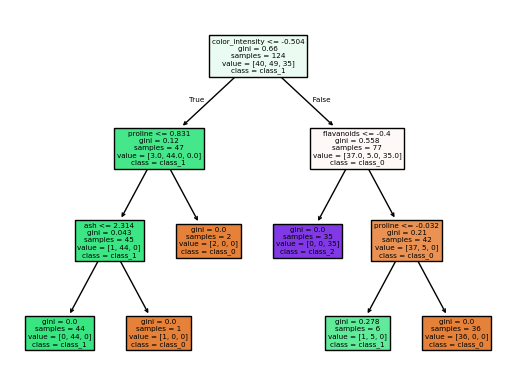

In [10]:
# visualizing using sklearn built-in tools
text_representation = tree.export_text(clf)
print(text_representation)
tree.plot_tree(clf, feature_names=feature_names, class_names=list(labels), filled=True)

## Visualize the decision tree using graphviz

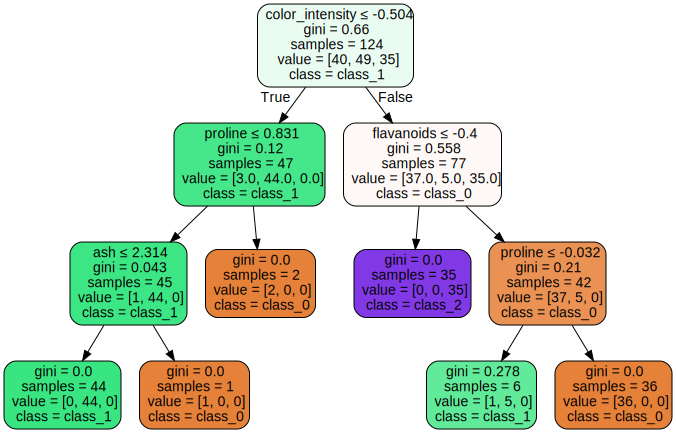

In [11]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=data.feature_names, 
                                   class_names=data.target_names, filled=True, 
                                   rounded=True, special_characters=True, fontname="Arial") 
graph = graphviz.Source(dot_data)
# graph.render("wine_decision_tree")  # Uncomment to save the graph
graph